In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [5]:
x_train = x_train.astype(float)
x_test  = x_test.astype(float)

In [6]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test) 

In [7]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker',
    'Bag','Ankle boot']

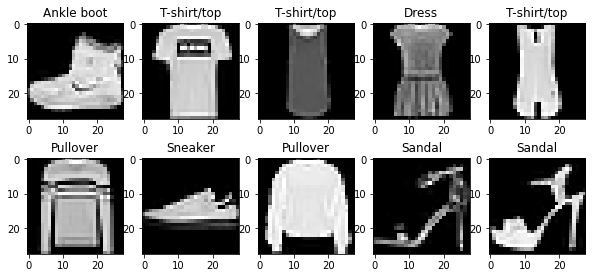

In [8]:
plt.figure(figsize = (10,12))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap = 'gray')
    plt.title(class_names[y_train[i]])
plt.show()

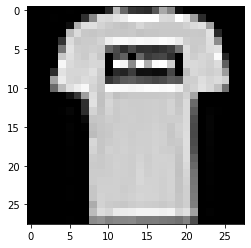

In [9]:
plt.imshow(x_train[1], cmap = 'gray')
plt.show()

In [10]:
import keras

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPool2D, Flatten, Dense

In [12]:
model = Sequential()
model.add(Conv2D(filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))
model.add(Activation('relu'))

In [13]:
model.add(Conv2D(filters = 5, kernel_size = (3,3), strides = (1,1), padding = 'valid'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (3,3), strides = (1,1)))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(45 , activation = 'relu'))
model.add(Dense(10 , activation = 'softmax'))

In [16]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam' , 
              metrics = ['accuracy'])

In [ ]:
model.fit(x = x_train,
         y = y_train_ohe,
         batch_size = 5000,
         validation_data = (x_test , y_test_ohe),
         epochs = 5)

Epoch 1/5
12/12 [==============================] - 16s 1s/step - loss: 4.3198 - accuracy: 0.4496 - val_loss: 1.2819 - val_accuracy: 0.5895
Epoch 2/5
12/12 [==============================] - 15s 1s/step - loss: 1.1341 - accuracy: 0.6284 - val_loss: 1.0059 - val_accuracy: 0.6649
Epoch 3/5
12/12 [==============================] - ETA: 0s - loss: 0.8905 - accuracy: 0.7017

In [ ]:
plt.plot(model.history.history['val_accuracy'])
plt.plot(model.history.history['accuracy'])
plt.legend(['VAL-ACC','TRAIN-ACC'])
plt.title('Accuracy Measure')
plt.xlabel('EPOCH #')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
plt.plot(model.history.history['val_loss'])
plt.plot(model.history.history['loss'])
plt.legend(['VAL-LOSS','TRAIN-LOSS'])
plt.title('Loss Measure')
plt.xlabel('EPOCH #')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [ ]:
model.summary()